model order 0 with coef [ 2.00065594]
model order 1 with coef [ 1.99747041  3.01796043]
model order 2 with coef [ 1.99091551  3.01771661  0.01987519]
model order 3 with coef [ 1.99091807  2.98671461  0.01927269  0.05208809]
mse= [3.9213257041388832, 1.0337536924569821, 1.0337213807174959, 1.033801626463559]


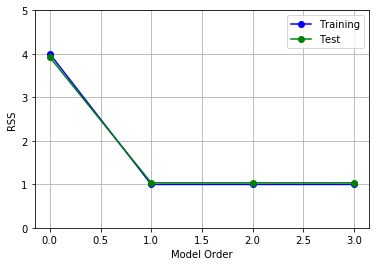

In [2]:
#3(a), 3(b) 3(c) 3(d)

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

nsamp = 10000
ntr = nsamp // 2
nts = nsamp - ntr

#create sample
#y = 2 + 3x + e, e ~ n(0,1)
x = np.random.uniform(-1, 1, 10000)
e = np.random.normal(0, 1, 10000)
y = 2 + 3*x + e


xtr = x[:ntr]
ytr = y[:ntr]
xts = x[ntr:]
yts = y[ntr:]

dtest = np.array(range(0,4))
RSStest = []
RSStr = []

for d in dtest:
    #fit data
    beta_hat = poly.polyfit(xtr, ytr, d)
    yhat = poly.polyval(xtr, beta_hat)
    RSSd = np.mean((yhat - ytr)**2)
    RSStr.append(RSSd)
    print('model order', d, 'with coef', beta_hat)
    
    #measure RSS on test data
    yhat = poly.polyval(xts, beta_hat)
    RSSd = np.mean((yhat - yts)**2)
    RSStest.append(RSSd)

print('mse=', RSStest)
plt.plot(dtest, RSStr, 'bo-')
plt.plot(dtest, RSStest, 'go-')
plt.xlabel('Model Order')
plt.ylabel('RSS')
plt.grid()
plt.ylim(0,5)
plt.legend(['Training', 'Test'], loc='upper right')
plt.show()

#We will pick the model with degree one. Given the similar mse, we would choose the model
#that has less complexity

MSE of test data [1.576257460798304, 0.1935867712230252, 0.08053278066590129, 0.0846826723293384]


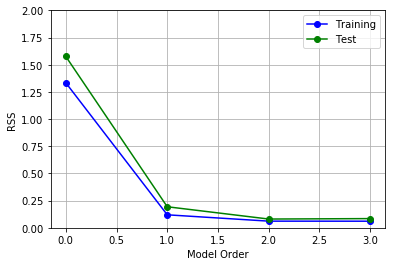

In [240]:
#3(e)
flow_data = pd.read_csv('/Users/lumi/Documents/UCLA/Grad/18 SPRING/c261/flow_data.csv')
nsamp = len(flow_data)
ntr = nsamp // 2
nts = nsamp - ntr

xtr = flow_data.radius[:ntr]
ytr = flow_data.flow[:ntr]
xts = flow_data.radius[ntr:]
yts = flow_data.flow[ntr:]

dtest = np.array(range(0,4))
RSStest = []
RSStr = []

for d in dtest:
    #fit data
    beta_hat = poly.polyfit(xtr, ytr, d)
    yhat = poly.polyval(xtr, beta_hat)
    RSSd = np.mean((yhat - ytr)**2)
    RSStr.append(RSSd)
    
    #measure RSS on test data
    yhat = poly.polyval(xts, beta_hat)
    RSSd = np.mean((yhat - yts)**2)
    RSStest.append(RSSd)

print('MSE of test data', RSStest)
plt.plot(dtest, RSStr, 'bo-')
plt.plot(dtest, RSStest, 'go-')
plt.xlabel('Model Order')
plt.ylabel('RSS')
plt.grid()
plt.ylim(0,2)
plt.legend(['Training', 'Test'], loc='upper right')
plt.show()

#3e: model with polynomial with degree two best fits the data
#3f: yes, because flow rate is propotional to the pi*radius^2. The most complext model could have lower traning MSE
#, but we might have over-fitting problem.

error proportion ml = 0.0217
error proportion map =  0.0206


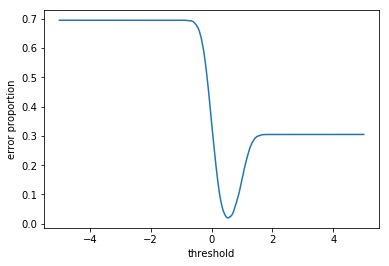

minimum error proportion 0.02
at threshold =  0.53 , we found the minimum error proportion


In [24]:
#4c, 4d

n = 10**4
q = 0.3
#create true y
y = np.random.binomial(1, q, n)
x = []
yml = []
ymap = []
error_ml = 0
error_map = 0


#create sample x
for i in range(0, n):
    if y[i] == 0:
        x.append(np.random.normal(0, 0.25, 1))
    elif y[i] == 1:
        x.append(np.random.normal(1, 0.25, 1))

#ml
for i in range(0, n):
    if x[i] >= 0.5:
        yml.append(1)
    else:
        yml.append(0)

for i in range(0, n):
    if y[i] == yml[i]:
        error_ml = error_ml
    else:
        error_ml = error_ml + 1
error_ml_p = error_ml / n
print('error proportion ml =', error_ml_p)

#map
for i in range(0, n):
    if x[i] >= 0.552956:
        ymap.append(1)
    else:
        ymap.append(0)

for i in range(0, n):
    if y[i] == ymap[i]:
        error_map = error_map
    else:
        error_map = error_map + 1
error_map_p = error_map / n
print('error proportion map = ', error_map_p)


#4e
errorfun = []
threshold = [t*0.01 for t in range(-500, 501)]
for j in range(0, len(threshold)):
    yhat = []
    error = 0
    for i in range(0, n):
        if x[i] >= threshold[j]:
            yhat.append(1)
        else:
            yhat.append(0)
    for i in range(0, n):
        if y[i] == yhat[i]:
            error = error
        else:
            error = error + 1
    error_p = error / n
    errorfun.append(error_p)
    error_p = 0

plt.plot(threshold, errorfun)
plt.ylabel('error proportion')
plt.xlabel('threshold')
plt.show()

minerror = min(errorfun)
print('minimum error proportion', minerror)
index = errorfun.index(min(errorfun))
print('at threshold = ', threshold[index], ', we found the minimum error proportion')

#We found our threshold with the minimum error proportion at 0.53, which is closer to the MAP threshold. 
#It is because we were given the prior probability.